1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

In [2]:
def std(data):
    '''standartization'''

    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            data[i][j] = (data[i][j] - means[j])/stds[j]
            
    return data

2. Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [3]:
def mserror(X, w, y_pred, lambda_=1e-8):
    '''mean squared error'''
    
    y = X@w
    L2 = lambda_ * np.sum(w**2) # create L2
    
    return (sum((y - y_pred)**2)) / len(y) + L2

In [4]:
def sgb(data, eta=1e-2, max_iter=1e5):
    '''stochastic gradient boosting'''
    
    w = np.zeros(data.shape[1])
    w_list = [w.copy()]
    np.random.seed(1234)
    
    iter_num = 0
    errors = []
    
    while iter_num < max_iter:

        train_ind = np.random.randint(data.shape[0])

        new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind]))/target.shape[0]

        w_list.append(new_w.copy())
        errors.append(mserror(data, new_w, target))

        iter_num += 1
        w = new_w

    w_list = np.array(w_list)
    
    return errors

In [5]:
def gb(data, eta=1e-2, max_iter = 1e5):
    '''gradient boosting'''
    
    w = np.zeros(data.shape[1])
    w_list = [w.copy()]
    np.random.seed(1234)
    
    iter_num = 0
    errors = []

    while iter_num < max_iter:
        
        new_w = w - 2 * eta * np.dot(data.T, (np.dot(data, w) - target))/target.shape[0]

        w_list.append(new_w.copy())
        errors.append(mserror(data, new_w, target))

        iter_num += 1
        w = new_w

    w_list = np.array(w_list)

    return errors

In [6]:
data, target, coef = datasets.make_regression(
    n_samples=100, n_features=10,
    n_informative=2, n_targets=1,
    noise=5, coef=True,
    random_state=2
)

data[:2]

array([[-0.72228806, -0.73960708, -0.75137484, -2.10355834,  0.30835626,
        -0.24814334,  0.09357179, -0.94575171, -0.28770371,  0.03006006],
       [-0.76832325, -0.09319787, -0.19733095,  0.29123401, -0.01333975,
         1.07682965,  0.43741023,  0.13563142, -0.88270882,  0.88474419]])

In [7]:
data = std(data)
data[:2]

array([[-0.62021026, -0.71356429, -0.68643892, -1.98288234,  0.21993735,
        -0.30010234,  0.07684171, -0.78355707, -0.32816442,  0.13232819],
       [-0.66631464, -0.09101057, -0.13508863,  0.59013641, -0.10948999,
         0.9230594 ,  0.44130038,  0.2938604 , -0.96178912,  0.9402435 ]])

In [8]:
iterations = 4e4

res_sgb = np.array(sgb(data, max_iter=iterations))
res_gb = np.array(gb(data, max_iter=iterations))

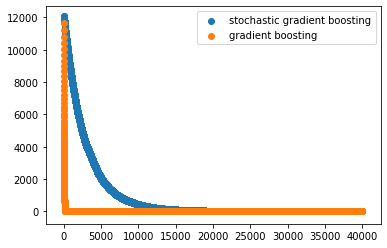

In [9]:
pease_of_name = 'gradient boosting'

plt.scatter(range(res_sgb.shape[0]), res_sgb, label=f'stochastic {pease_of_name}')
plt.scatter(range(res_gb.shape[0]), res_gb, label=f'{pease_of_name}')

plt.legend()
plt.show()

In [10]:
res_sgb[-5:] # looking at errors

array([21.39257869, 21.39178695, 21.39178099, 21.39163932, 21.39245361])

In [11]:
res_gb[-5:] # looking at errors

array([21.26210512, 21.26210512, 21.26210512, 21.26210512, 21.26210512])

__Вывод:__<br>
__Скорость сходимость__ больше у обычного __градиентного спуска__.